# **Import Libraries**

In [1]:
import numpy as np 
import pandas as pd
import sklearn.datasets
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , precision_score,confusion_matrix

%matplotlib inline

In [2]:
import sys
sys.path.append('/kaggle/input/titanic-prediction-dataset/titanic dataset.csv')

# **Data Collection & Processing**

In [3]:
# Load the Titanic dataset from a CSV file
titanic_data = pd.read_csv('/kaggle/input/titanic-prediction-dataset/titanic dataset.csv')

In [7]:
# Display the first few rows of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Is_Alone,Fare_Per_Person,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,3.62500,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,35.64165,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,7.92500,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,26.55000,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,8.05000,Adult


In [8]:
# number of rows and Columns
titanic_data.shape

(891, 17)

In [9]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              714 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
 12  Title            891 non-null    object 
 13  Family_Size      891 non-null    int64  
 14  Is_Alone         891 non-null    int64  
 15  Fare_Per_Person  891 non-null    float64
 16  Age_Group        714 non-null    object 
dtypes: float64(3), i

In [10]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Title                0
Family_Size          0
Is_Alone             0
Fare_Per_Person      0
Age_Group          177
dtype: int64

In [11]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [18]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)


/tmp/ipykernel_31/1877869685.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)


In [13]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [15]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [22]:
# Define a function to assign age groups
def assign_age_group(age):
    if age < 13:
        return 'Child'
    elif age < 20:
        return 'Teen'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

# Apply the function to fill the missing values in the "Age_Group" column
titanic_data['Age_Group'] = titanic_data['Age'].apply(assign_age_group)

# If there are still missing values in 'Age_Group', you can fill them with a placeholder
titanic_data['Age_Group'].fillna('Unknown', inplace=True)

/tmp/ipykernel_31/2702152972.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age_Group'].fillna('Unknown', inplace=True)


In [23]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Embarked           0
Title              0
Family_Size        0
Is_Alone           0
Fare_Per_Person    0
Age_Group          0
dtype: int64

In [24]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Is_Alone,Fare_Per_Person
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,0.602694,19.916375
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459,0.489615,35.841257
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,7.250000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,1.000000,8.300000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000,23.666667
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000,512.329200


In [25]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [27]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

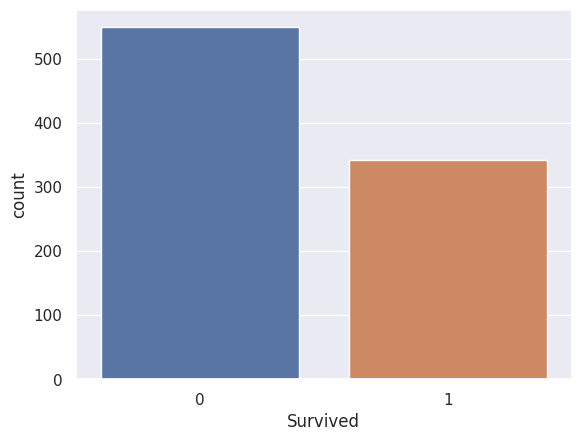

In [30]:
#making a count plot for the "Survived" column
sns.countplot(x='Survived', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

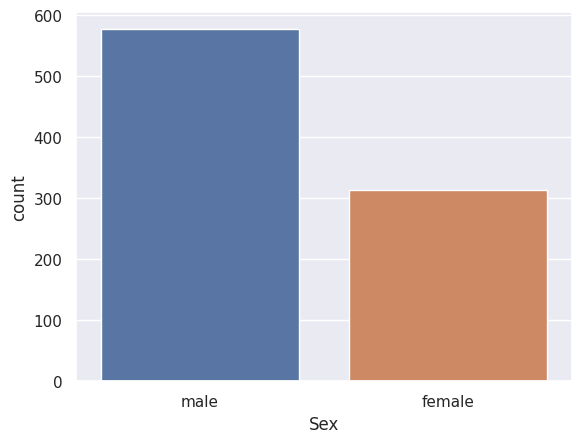

In [39]:
titanic_data['Sex'].value_counts()
# making a count plot for "Sex" column
sns.countplot(x='Sex', data=titanic_data)


<Axes: xlabel='Age_Group', ylabel='count'>

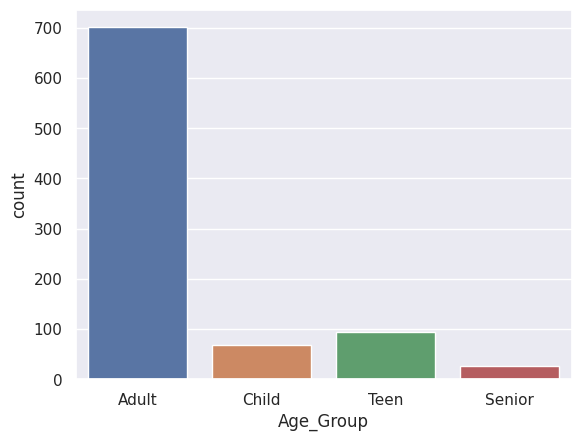

In [36]:
titanic_data['Age_Group'].value_counts()
# making a count plot for "Sex" column
sns.countplot(x='Age_Group', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

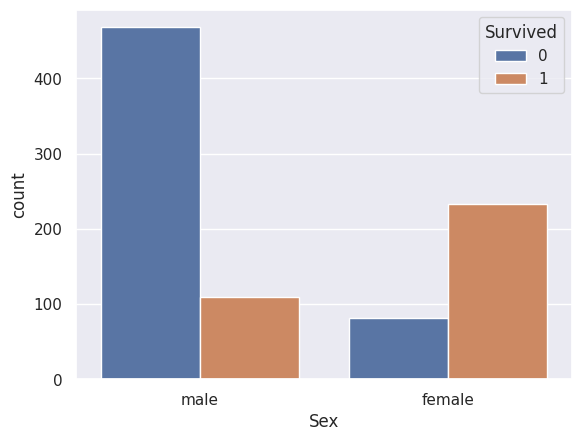

In [40]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Age_Group', ylabel='count'>

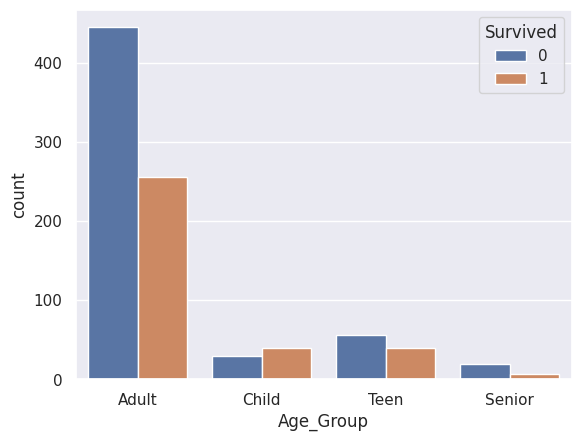

In [41]:
# number of survivors Gender wise
sns.countplot(x='Age_Group', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

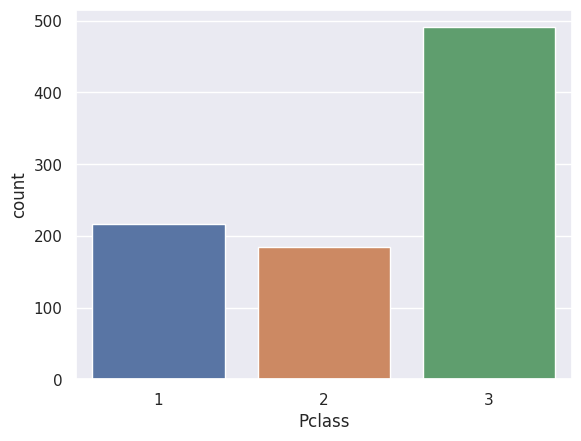

In [42]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

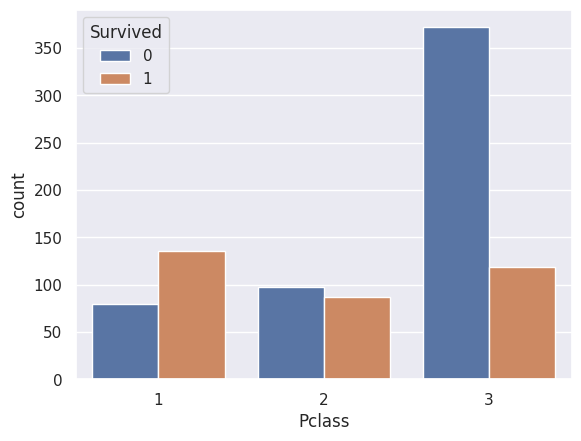

In [43]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

In [47]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2},'Age_Group':{'Child':0, 'Teen':1, 'Adult':2, 'Senior':3}}, inplace=True)

/tmp/ipykernel_31/518292881.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2},'Age_Group':{'Child':0, 'Teen':1, 'Adult':2, 'Senior':3}}, inplace=True)


In [49]:
# Removing a column from the dataset (in this case, "column_name")
titanic_data = titanic_data.drop('Title', axis=1)


In [51]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Is_Alone,Fare_Per_Person,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2,0,3.62500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2,0,35.64165,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,7.92500,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2,0,26.55000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,1,8.05000,2


In [52]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [53]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Family_Size  \
0         3    0  22.000000      1      0   7.2500         0            2   
1         1    1  38.000000      1      0  71.2833         1            2   
2         3    1  26.000000      0      0   7.9250         0            1   
3         1    1  35.000000      1      0  53.1000         0            2   
4         3    0  35.000000      0      0   8.0500         0            1   
..      ...  ...        ...    ...    ...      ...       ...          ...   
886       2    0  27.000000      0      0  13.0000         0            1   
887       1    1  19.000000      0      0  30.0000         0            1   
888       3    1  29.699118      1      2  23.4500         0            4   
889       1    0  26.000000      0      0  30.0000         1            1   
890       3    0  32.000000      0      0   7.7500         2            1   

     Is_Alone  Fare_Per_Person  Age_Group  
0           0          3.62500 

In [54]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# **Separating the features and target**

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(891, 11) (712, 11) (179, 11)


# **Model Training**

In [56]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, Y):
    return accuracy_score(Y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18),
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier()
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, Y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.58888889 0.58426966 0.69662921 0.75280899 0.68539326 0.68539326
 0.68539326 0.73033708 0.68539326 0.6741573 ]
Mean Score: 0.6768664169787765
Gaussian NB
Scores: [0.66666667 0.69662921 0.78651685 0.80898876 0.75280899 0.74157303
 0.78651685 0.78651685 0.78651685 0.84269663]
Mean Score: 0.7655430711610486
Random Forest
Scores: [0.75555556 0.83146067 0.74157303 0.83146067 0.87640449 0.79775281
 0.83146067 0.75280899 0.85393258 0.83146067]
Mean Score: 0.8103870162297129
Logistic Regression
Scores: [0.8        0.7752809  0.76404494 0.83146067 0.80898876 0.76404494
 0.80898876 0.7752809  0.82022472 0.82022472]
Mean Score: 0.7968539325842696


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

KNN
Scores: [0.64444444 0.75280899 0.71910112 0.73033708 0.69662921 0.71910112
 0.73033708 0.71910112 0.71910112 0.75280899]
Mean Score: 0.7183770287141072


# **Model Evaluation**

Accuracy on train data by SVM Classifier: 68.82022471910112
Accuracy on test data by SVM Classifier: 64.80446927374301


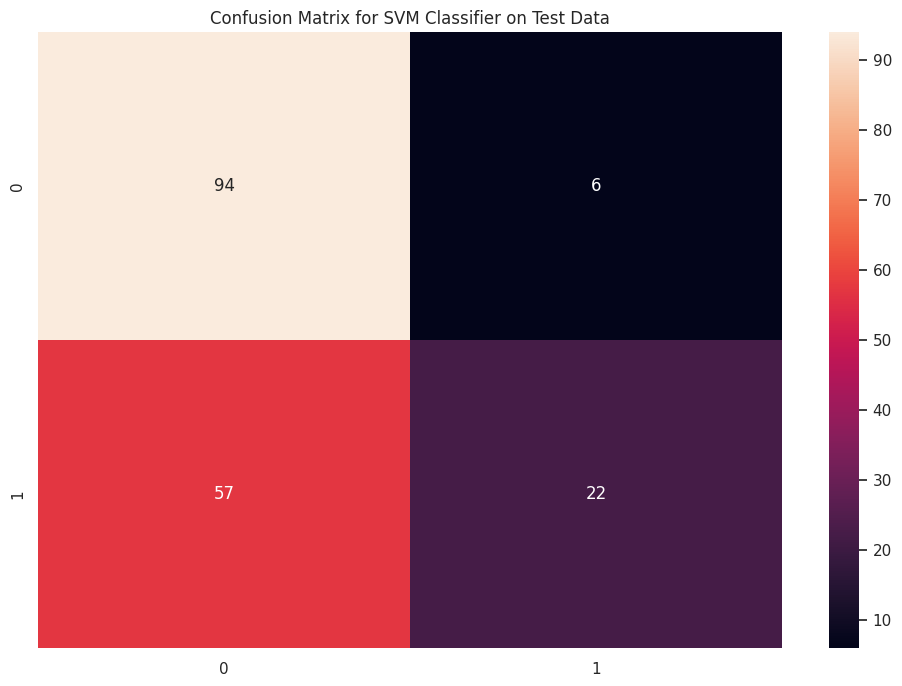

Accuracy on train data by Naive Bayes Classifier: 77.10674157303372
Accuracy on test data by Naive Bayes Classifier: 74.30167597765363


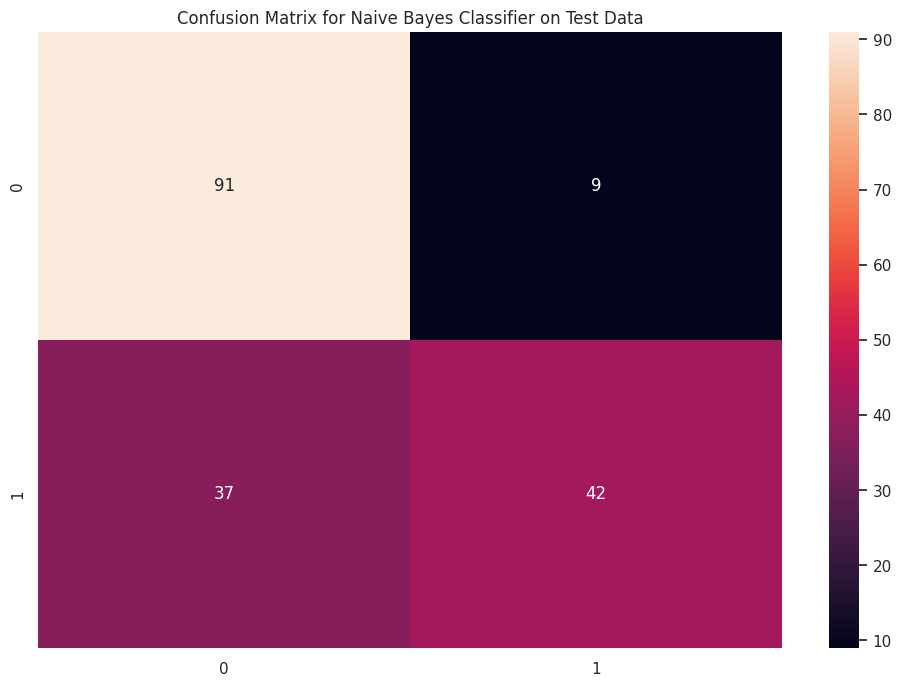

Accuracy on train data by Random Forest Classifier: 98.59550561797754
Accuracy on test data by Random Forest Classifier: 81.00558659217877


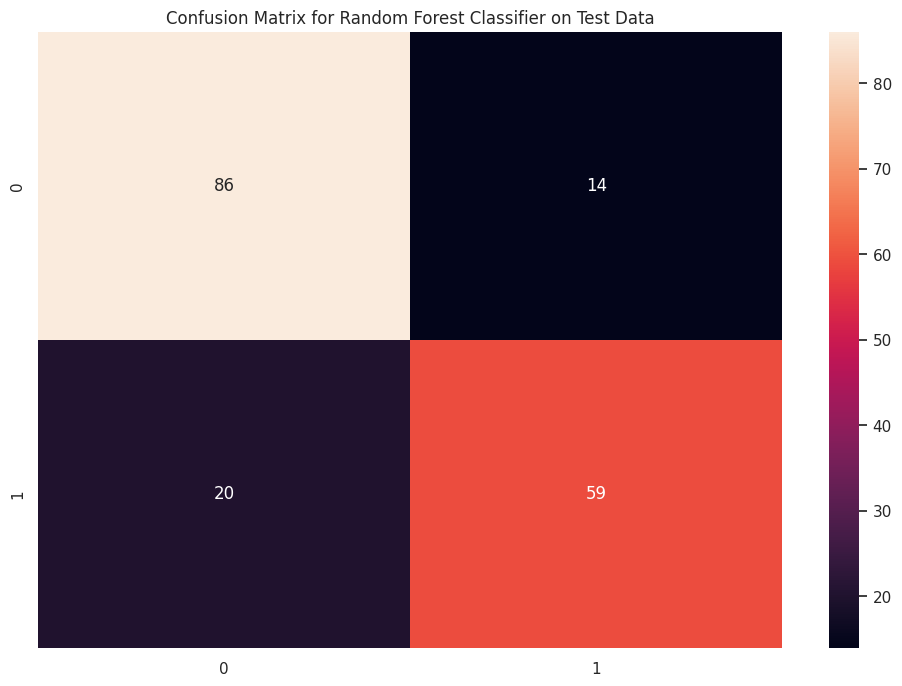

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on train data by Logistic Regression: 81.60112359550563
Accuracy on test data by Logistic Regression: 77.6536312849162


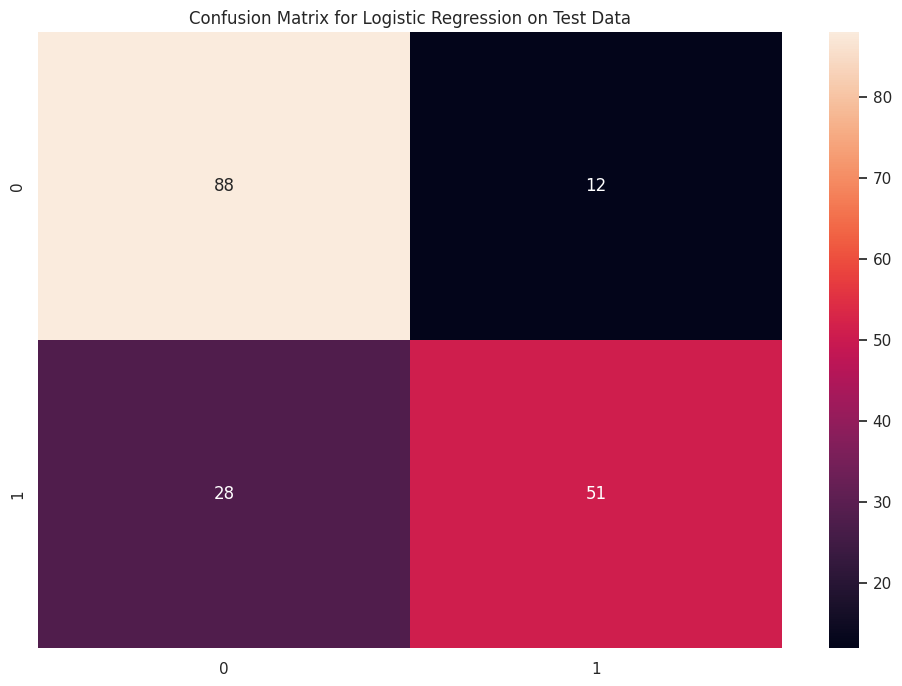

Accuracy on train data by KNN: 80.19662921348315
Accuracy on test data by KNN: 65.36312849162012


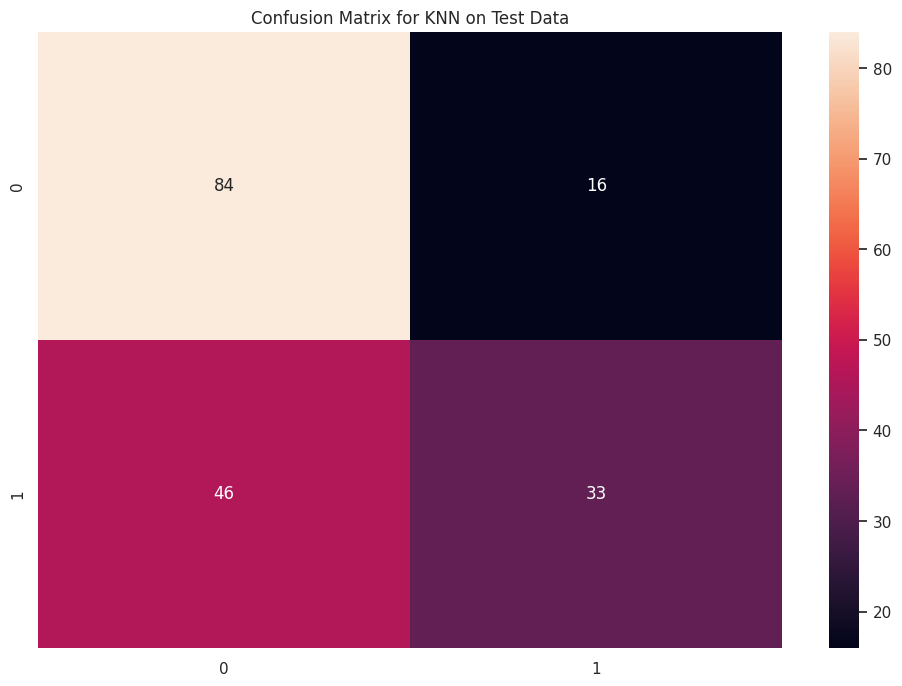

In [57]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, Y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(Y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(Y_test, preds)*100}")
cf_matrix = confusion_matrix(Y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(Y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(Y_test, preds)*100}")
cf_matrix = confusion_matrix(Y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, Y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(Y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(Y_test, preds)*100}")
cf_matrix = confusion_matrix(Y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

# Training and testing Logistic Regression
lg_model = LogisticRegression()
lg_model.fit(X_train, Y_train)
preds = lg_model.predict(X_test)
print(f"Accuracy on train data by Logistic Regression\
: {accuracy_score(Y_train, lg_model.predict(X_train))*100}")

print(f"Accuracy on test data by Logistic Regression\
: {accuracy_score(Y_test, preds)*100}")
cf_matrix = confusion_matrix(Y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Logistic Regression on Test Data")
plt.show()

# Training and testing KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
preds = knn_model.predict(X_test)
print(f"Accuracy on train data by KNN\
: {accuracy_score(Y_train, knn_model.predict(X_train))*100}")

print(f"Accuracy on test data by KNN\
: {accuracy_score(Y_test, preds)*100}")
cf_matrix = confusion_matrix(Y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for KNN on Test Data")
plt.show()

# **Building a Predictive System**

In [66]:
model.fit(X_train, Y_train) 

input_data = (1,1,38,1,0,71.2500,1,6,0,30.62500,6)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Titanic Survived')

else:
  print('Titanic not survived')

[1]
Titanic not survived


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [67]:
import joblib

model.fit(X_train, Y_train)

# Save the trained model
joblib.dump(model, 'titanic_survival.pkl')

['titanic_survival.pkl']

# **Model training & evaluation on 5 features**

In [84]:
X = titanic_data[['Pclass', 'Age', 'Fare', 'Family_Size']]
Y = titanic_data['Survived']
# Split the data (for example)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train your model as usual
model = SVC()
model.fit(X_train, Y_train)

# Make predictions and evaluate
preds = model.predict(X_test)

# Save the trained model
joblib.dump(model, 'titanic_model')

['titanic_model']